**UE 4268 - Examen 2023**

NGOUEMO BARBINE, 22v2221, barbine.ngouemo@facsciences-uy1.cm


Department of Physics - Faculty of Science - University of Yaoundé I

PNR

19/06/2023

In [1]:
from IPython.display import Image

# Algorithme de la VQE

**Cet exercice se traite exclusivement sur la feuille de composition**

L'algorithme du VQE (Variationnal Quantum Eigensolver) se résume en deux grandes parties qu'illustre la figure ci-dessous.
 
1. Expliquer pourquoi on dit que c'est un **algorithme hybride** en indiquant ce que fait chaque processeur. 
2. Qu'est-ce que la profondeur d'un circuit quantique et quelle son influence dans les algorithmes du VQE?

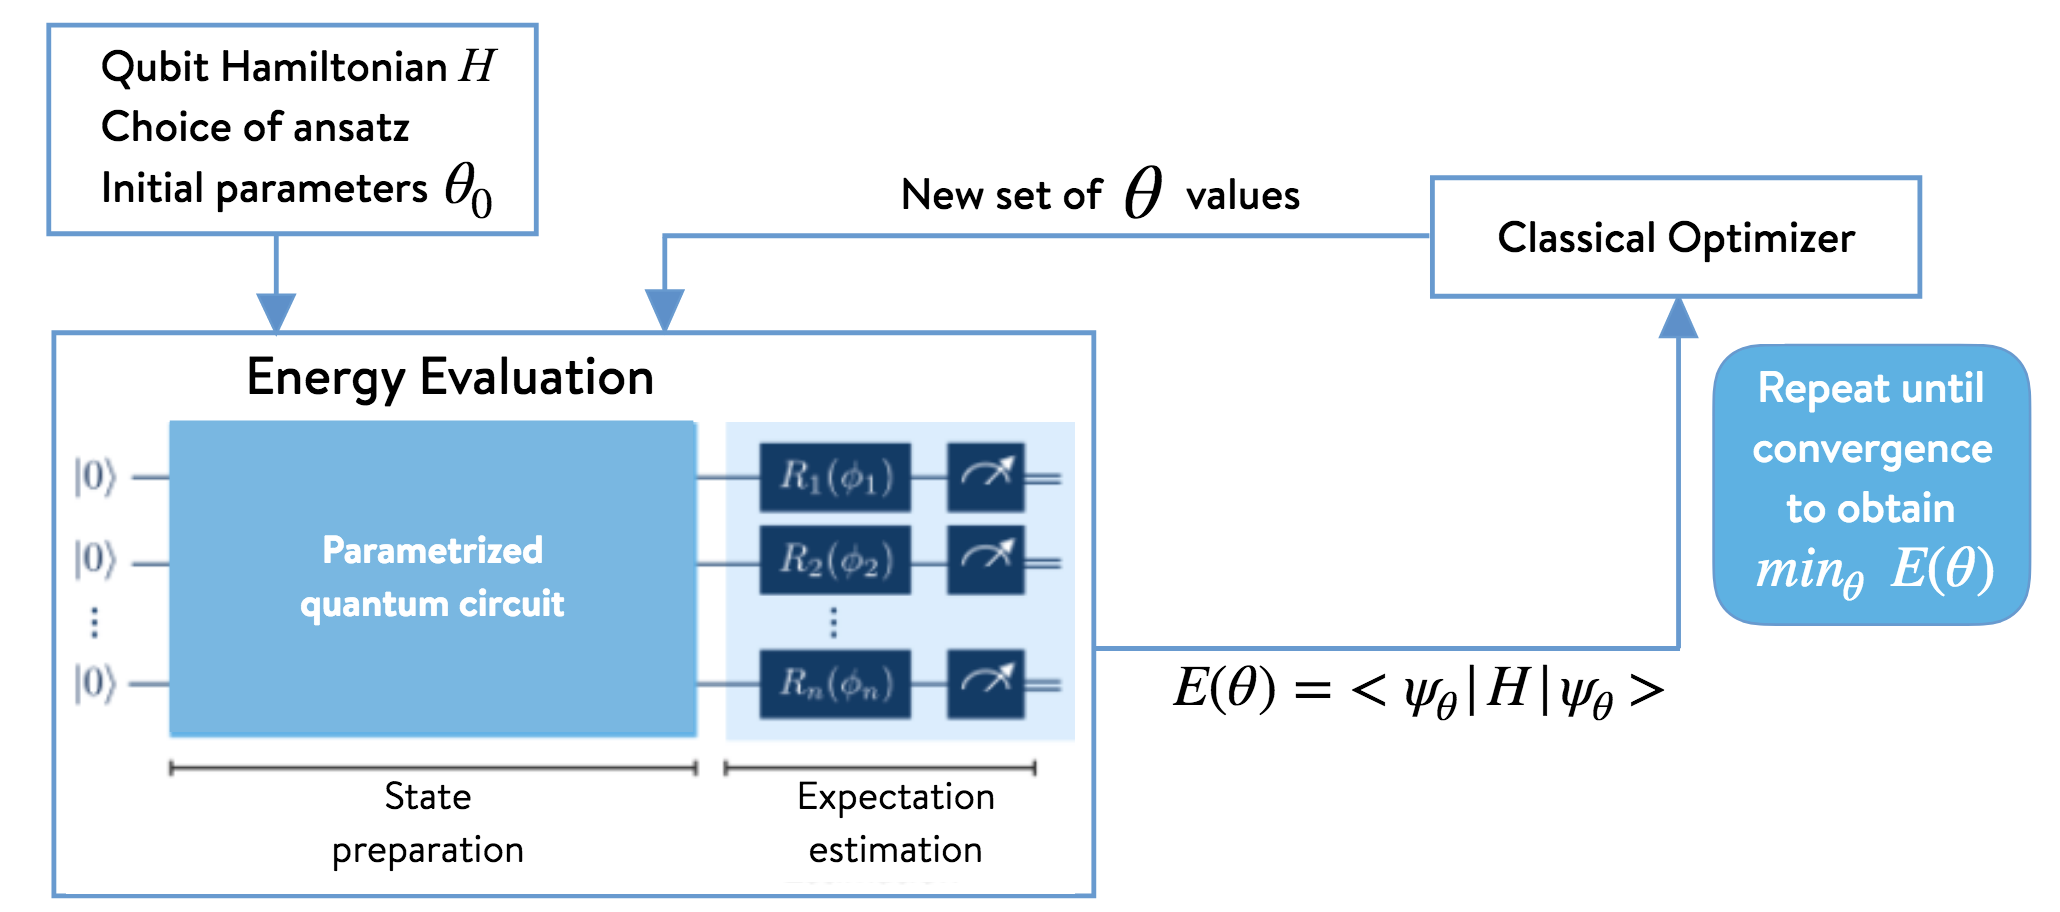

In [2]:
Image("./VQE_Diagram.png", width=600)

# Support Vector Regression to predict polarity of molecules

Write a python script that use a **support vector regression (SVR)** model to predict **TPSA** (**Topological polar surface area**, a physicochemical property describing the polarity of molecules) from molecules of the ZING Dataset contained in the file `'.Zn10.txt'`. The input - structural feature of molecules is Morgan fingerprint and the output is TPSA.

We recall that the **molecular fingerprint** represents the substructures of a molecule (array) as a vector of binary numbers. It is a molecular structure descriptor to use as input to reveal the relationship between molecular structure and properties, called **Quantitative Structure-Activity Relationships (QSAR)**.

The workflow is

1. Get molecular fingerprints of each molecule
2. Split the dataset to training set and test set
3. Train a SVR model
4. Check the accuracy of prediction with $R²$ and mean-square error
5. Visualize the results from the model.

**The various necessaries libraries and modules will be import only where they are needed**.


In [45]:
import sklearn
print(sklearn.__version__)

1.0.2


In [50]:
! pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.5/29.5 MB 327.5 kB/s eta 0:00:00m eta 0:00:010:00:03


1-)

In [56]:
# Import libraries 
import numpy as np
#Permet de tracer
import matplotlib.pyplot as plt
#bibliotheque
import pandas as pd 
import os
################################################################################
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem, PandasTools, Descriptors


In [57]:
import rdkit
print(rdkit.__version__)

2023.03.1


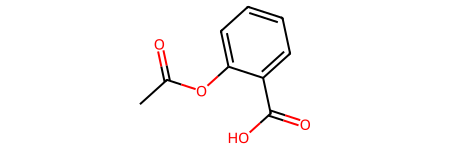

In [58]:
#permet de ressortir la molecule
smi = 'O=C(C)Oc1ccccc1C(=O)O'
m = Chem.MolFromSmiles(smi) # Convert smiles to molecule
m

In [59]:
fps = []
fp = AllChem.GetMorganFingerprintAsBitVect(m, 2, nBits=1024) 
# the number 2 denotes the number of iterations in Morgan algorithm.

fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
fps.append(fp)

fps = np.asarray(fps) # Convert our encoded molecule to an array
fps.shape


(1, 1024)

In [60]:
PATH = os.getcwd()
data_path = os.path.join(PATH, './Dataset/smilesZn100.txt')

In [61]:
with open(data_path, 'r') as f:
    content = f.readlines()
    smile = [smi.split() for smi in content]
    
smile

FileNotFoundError: [Errno 2] No such file or directory: '/home/ngouemo/Documents/[Template] UE4268_S2_2023/./Dataset/smilesZn100.txt'

In [67]:
df = pd.DataFrame(data=smile, columns=['Smiles'])
#ici on sectionne notre base de donnee via df1
df1 = df.iloc[:1000,:]#.values nous donne les valeurs
df1
#si on me demande de travailler avec les 1000 premiers valeurs j aurais par exemple df1 = df.iloc[:1000,:]

NameError: name 'smile' is not defined

In [65]:
def calculate_descriptors(mol):
    mw = Descriptors.MolWt(mol)
    logp = Descriptors.MolLogP(mol)
    hbd = Descriptors.NumHDonors(mol)
    hba = Descriptors.NumHAcceptors(mol)
    psa = Descriptors.TPSA(mol)
    rb = Descriptors.NumRotatableBonds(mol)
    rg = Descriptors.NumAromaticRings(mol)
    qed = Chem.QED.qed(mol)
    return [mw, logp, hbd, hba, psa, rg, rb, qed]

In [66]:
molecule = df1.iloc[:,1].values
descriptors = [calculate_descriptors(mol) for mol in molecule]

NameError: name 'df1' is not defined

2-)

In [ ]:
logp = data.iloc[:,3].values

In [ ]:
logp.shape[0] == fps.shape[0]

# Calculer l'état fondamental de la molécule de phenylsulfonyl-carbazole (PSPCz)

Les calculateurs quantiques pourraient être des outils inestimables pour étudier la structure électronique et les propriétés dynamiques de molécules et de matériaux complexes, car il est plus logique de modéliser des systèmes de la physique quantique sur un dispositif quantique que sur un calculateur classique. Le phenylsulfonyl-carbazole (PSPCz) dont la formule moléculaire est $C_{18}H_{13}NO_2S$ et son SMILES isomérique est C1=CC=C(C=C1)S(=O)(=O)C2=CC=CC3=C2NC4=CC=CC=C34, a des propriétés émettrices utiles de fluorescence retardée activée thermiquement (TADF) pour les applications de diodes électroluminescentes organiques (OLED). Son Hamiltonien en représentation de Pauli $\{\mathtt{I,\,X,\,Y,\,Z}\}$ est

$$ \mathtt{H} = h_1(\mathtt{I}\otimes\mathtt{I}) + h_2(\mathtt{Z}\otimes\mathtt{I} - \mathtt{I}\otimes\mathtt{Z}) + h_3(\mathtt{Z}\otimes\mathtt{Z}) + h_4(\mathtt{x}\otimes\mathtt{X}) + h_5(\mathtt{X}\otimes\mathtt{I} + \mathtt{I}\otimes\mathtt{X} + \mathtt{X}\otimes\mathtt{Z} - \mathtt{Z}\otimes\mathtt{X}),$$

où les coefficients 
$$h_1 = -0.518418,\, h_2 = -0.136555,\, h_3 = -0.025866,\, h_4 = 0.015725,\, h_5 = -0.000296.$$

1. Utiliser `rdkit.Chem` pour représenter en 2D de molécule PSPCz à partir de son SMILES.

In [ ]:
# Put your code here

In [51]:
# Pour les données moléculaires
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.drivers import PySCFDriver



In [52]:
H2_driver = PySCFDriver(
    atom="H 0 0 0; H 0 0 0.735",
    basis="sto3g",
    charge=0,
    spin=0,
    unit=DistanceUnit.ANGSTROM,
)

In [53]:
H2_problem = H2_driver.run()
print(H2_problem)

In [54]:
H2_hamiltonian = H2_problem.hamiltonian

H2_coefficients = H2_hamiltonian.electronic_integrals
print(H2_coefficients.alpha)

Polynomial Tensor
 "+-":
[[-1.25633907e+00  0.00000000e+00]
 [-4.16333634e-17 -4.71896007e-01]]
 "++--":
[[[[ 6.75710155e-01  4.85722573e-17]
   [ 1.11022302e-16  1.80931200e-01]]

  [[ 8.32667268e-17  1.80931200e-01]
   [ 6.64581730e-01 -5.55111512e-17]]]


 [[[ 1.04083409e-16  6.64581730e-01]
   [ 1.80931200e-01  0.00000000e+00]]

  [[ 1.80931200e-01  1.94289029e-16]
   [ 8.32667268e-17  6.98573723e-01]]]]


In [55]:
H2_fermionic_op = H2_hamiltonian.second_q_op()
print(H2_fermionic_op)

Fermionic Operator
number spin orbitals=4, number terms=36
  -1.2563390730032498 * ( +_0 -_0 )
+ -0.4718960072811421 * ( +_1 -_1 )
+ -1.2563390730032498 * ( +_2 -_2 )
+ -0.4718960072811421 * ( +_3 -_3 )
+ 0.33785507740175813 * ( +_0 +_0 -_0 -_0 )
+ 0.09046559989211567 * ( +_0 +_0 -_1 -_1 )
+ 0.09046559989211565 * ( +_0 +_1 -_0 -_1 )
+ 0.33229086512764844 * ( +_0 +_1 -_1 -_0 )
+ 0.33785507740175813 * ( +_0 +_2 -_2 -_0 )
+ 0.09046559989211567 * ( +_0 +_2 -_3 -_1 )
+ 0.09046559989211565 * ( +_0 +_3 -_2 -_1 )
+ 0.33229086512764844 * ( +_0 +_3 -_3 -_0 )
+ 0.3322908651276482 * ( +_1 +_0 -_0 -_1 )
+ 0.09046559989211575 * ( +_1 +_0 -_1 -_0 )
+ 0.09046559989211568 * ( +_1 +_1 -_0 -_0 )
+ 0.3492868613660087 * ( +_1 +_1 -_1 -_1 )
+ 0.3322908651276482 * ( +_1 +_2 -_2 -_1 )
+ 0.09046559989211575 * ( +_1 +_2 -_3 -_0 )
+ 0.09046559989211568 * ( +_1 +_3 -_2 -_0 )
+ 0.3492868613660087 * ( +_1 +_3 -_3 -_1 )
+ 0.33785507740175813 * ( +_2 +_0 -_0 -_2 )
+ 0.09046559989211567 * ( +_2 +_0 -_1 -_3 )
+ 0.09046

2. Utiliser, pour calculer l'état fondamental de la molécule PSPCz,
   * `qiskit.opflow.operator_globals` et 
   * `qiskit.algorithms.minimum_eigensolvers.NumPyMinimumEigensolver`.

In [ ]:
# Put your code here

# VQE avec un Hardware Efficient Ansatz (HEA)

1. Utiliser  `qiskit.circuit.library.EfficientSU2` pour reproduire le Hardware Efficient Ansatz (HEA) suivant : 

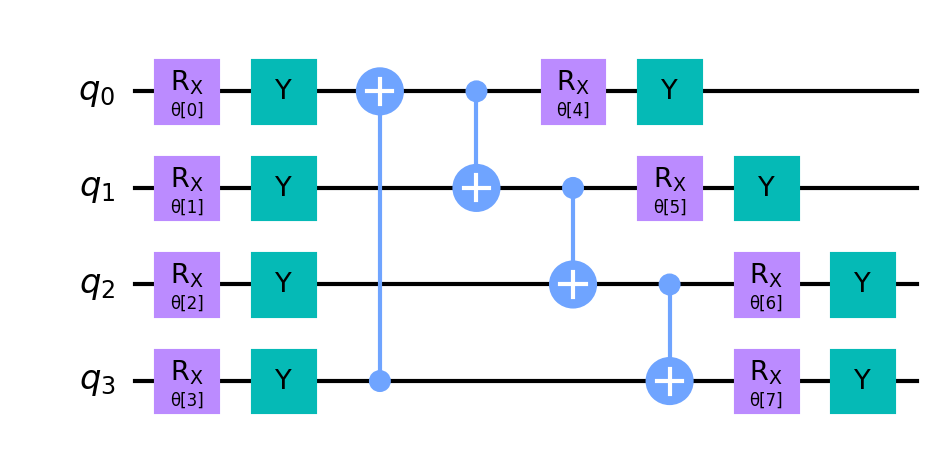

In [3]:
Image(filename='./SU2_Ansatz.png', width=400)

In [5]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.tools.visualization import circuit_drawer, array_to_latex
from qiskit.quantum_info import state_fidelity
from qiskit import Aer, transpile

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi

In [7]:
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
theta= Parameter('𝜃')
import numpy as np

In [8]:
q = QuantumRegister(1)

In [42]:
parameter = Parameter('\\theta')

qc = QuantumCircuit(4)
qc.rx(0)
qc.h(1)
qc.cx(0,1)
qc.h(2)
qc.cx(1,2)
qc.h(3)
qc.cx(2,3)
qc.p(theta = parameter, qubit = 3) # Ici on tient compte que la porte phase P(phi) et RZ(theta sont equivalentes)
qc.cx(2,3)
qc.cx(1,2)
qc.cx(0,1)
qc.h(1)
qc.h(2)
qc.h(3)

qc.rx(-pi/2,0)

qc.draw('mpl')


TypeError: rx() missing 1 required positional argument: 'qubit'

2. Utiliser ce HEA (que l'on nommera `SU2ansatz`) dans l'algorithme VQE, définit ci-dessous par la fonction `algorithm(problem, mapper, optimizer)`, pour calculer l'état fondamental de la molécule $H_2$.

In [17]:
from qiskit.primitives import Estimator
from qiskit.algorithms.minimum_eigensolvers import VQE
from qiskit_nature.second_q.algorithms import GroundStateEigensolver

import numpy as np

def algorithm(problem, mapper, optimizer):
    """ Setup VQE solver algorithm

    Args:
        problem : Electronic Structure Problem
        mapper : qubit mapper 
        optimizer : optimizer

    Returns: vqe solver algorithm
    """    
    
    #ansatz
    ansatz = SU2ansatz # previously constructed
    
    #VQE algorithm solver
    vqe_solver = VQE(Estimator(), ansatz, optimizer)
    vqe_solver.initial_point = np.zeros(ansatz.num_parameters)
 
    # Ground state computation using a minimum eigensolver
    algorithm = GroundStateEigensolver(mapper, vqe_solver)
       
    # Compute Ground State properties.
    algorithm = algorithm.solve(problem)
    
    return algorithm

In [18]:
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.second_q.transformers import FreezeCoreTransformer

H2_driver = PySCFDriver(
    atom='H .0 .0 -0.3625; H .0 .0 0.3625',
    basis="sto3g",
    charge=0,
    spin=0,
    unit=DistanceUnit.ANGSTROM,
)
# Electronic structure problem
H2_problem = H2_driver.run()
transformer = FreezeCoreTransformer()
H2_problem = transformer.transform(H2_problem)

In [19]:
from qiskit_nature.second_q.mappers import JordanWignerMapper
from qiskit_nature.second_q.mappers import TaperedQubitMapper
from qiskit.algorithms.optimizers import SLSQP

# Put your code here

In [20]:
from qiskit_nature.second_q.circuit.library import HartreeFock, UCCSD

def ansatz(mapper):
    """Ansatz function

    Args:
        mapper : the output of the function qubit_mapper(mapper)

    Returns: The anstatz
    """    
    
    ansatz = UCCSD(
        H2_problem.num_spatial_orbitals,
        H2_problem.num_particles,
        mapper,
        initial_state=HartreeFock(
            H2_problem.num_spatial_orbitals,
            H2_problem.num_particles,
            mapper,
        ),
    )
    return ansatz

In [21]:
from qiskit.primitives import Estimator

estimator = Estimator()

In [22]:
from qiskit.algorithms.optimizers import SPSA, SLSQP, L_BFGS_B

In [23]:
from qiskit.algorithms.minimum_eigensolvers import VQE
import numpy as np

def vqe_solver(mapper, optimizer):
    """ Setup VQE solver

    Args:
        mapper : qubit mapper 
        optimizer : optimizer

    Returns: vqe solver
    """    
    vqe_solver = VQE(estimator, ansatz(mapper), optimizer)

    vqe_solver.initial_point = np.zeros(ansatz(mapper).num_parameters)
    return vqe_solver

In [24]:
def run_vqe(problem, solver, mapper, optimizer = "SLSQP", show=True):
    """Computing of the molecular ground state with the `GroundStateEigensolver`
class 
    Args:
        problem :  Electronic structure problem

        mapper : Mapper string that can be "PM" or "JWM" or "BKM"
        
        optimizer :  Optimizer string that can be either "SPSA" or "SLSQP" or "L_BFGS_B"

        solver :  Sting that can be either "NumPy" or "VQE"
       
    Returns:
          The ground state of the molecule

    """    
    # Mapper
    dmap = {"JWM": JordanWignerMapper(), "PM": ParityMapper(),  "BKM": BravyiKitaevMapper()}
    for k, v in dmap.items():
        if k == mapper:        
            mapp = v   
            
    if solver == "VQE":             
        # Optimizer
        dopt = {"SPSA": SPSA(), "SLSQP": SLSQP(), "L_BFGS_B": L_BFGS_B()}
        for n, m in dopt.items():
            if n == optimizer:        
                opt = m
        GS_solver = vqe_solver(mapp, opt)

    # Solver
    if solver == "Numpy":
        GS_solver = NumPyMinimumEigensolver()

    # Ground state computation using a minimum eigensolver. Returns the solver.
    Algo = GroundStateEigensolver(mapp, GS_solver) 
    
    # Leveraging Qiskit Runtime
    start = time.time()
    
    # Compute Ground State properties.
    ground_state = Algo.solve(problem)
    elapsed = str(datetime.timedelta(seconds = time.time()- start))
    
    if show:
        print(f'Running {solver} and {mapper} mapper')
        if solver == "VQE":
            print(f'With {optimizer} optimizer and UCCSD ansatz')
        print(f'Elapsed time: {elapsed} \n')

        print(ground_state.total_energies[0])

    if solver == "VQE":
        return ground_state, elapsed, mapper, solver, optimizer
    else:
        return ground_state, elapsed, mapper, solver


In [25]:
from qiskit_nature.second_q.mappers import ParityMapper, JordanWignerMapper, BravyiKitaevMapper
from qiskit_nature.second_q.algorithms import GroundStateEigensolver
import time, datetime

res_vqe = run_vqe(H2_problem, mapper="PM", optimizer="SLSQP", solver="VQE")

/home/ngouemo/mambaforge/envs/ngouemo_labs/lib/python3.7/site-packages/qiskit_nature/deprecation.py:297: PauliSumOpDeprecationWarning: PauliSumOp is deprecated as of version 0.6.0 and support for them will be removed no sooner than 3 months after the release. Instead, use SparsePauliOp. You can switch to SparsePauliOp immediately, by setting `qiskit_nature.settings.use_pauli_sum_op` to `False`.
  return func(*args, **kwargs)


Running VQE and PM mapper
With SLSQP optimizer and UCCSD ansatz
Elapsed time: 0:00:00.937467 

-1.1372213770151214


In [29]:
from qiskit.algorithms.minimum_eigensolvers import NumPyMinimumEigensolver

In [30]:
res_np = run_vqe(H2_problem, mapper="PM", solver="Numpy")

Running Numpy and PM mapper
Elapsed time: 0:00:00.400266 

-1.1372213770723005


In [31]:
rel_error = (res_np[0].total_energies[0] - res_vqe[0].total_energies[0])*100/res_np[0].total_energies[0] 
print(f'\n The relative error between the two calculations is {rel_error:.4f}%')


 The relative error between the two calculations is 0.0000%


In [32]:
print(f"Type of solver  | GS electronic energy  |Elapsed time\t\t|Mapper | Optimizer | Rel. error  ")
print('================================================================================================')
print(f'{res_np[3]}\t\t| {res_np[0].total_energies[0]}   |{res_np[1]}\t\t|{res_np[2]} \t|\t    | ')
#print(f'Solver {name}   | {mapper}        |{optimizer}|{res_vqe.groundenergy}')
print(f'{res_vqe[3]}\t\t| {res_vqe[0].total_energies[0]}   |{res_vqe[1]}\t\t|{res_vqe[2]}\t|{res_vqe[4]}\t    |{rel_error:7.4f}%  ')
print('------------------------------------------------------------------------------------------------')


Type of solver  | GS electronic energy  |Elapsed time		|Mapper | Optimizer | Rel. error  
Numpy		| -1.1372213770723005   |0:00:00.400266		|PM 	|	    | 
VQE		| -1.1372213770151214   |0:00:00.937467		|PM	|SLSQP	    | 0.0000%  
------------------------------------------------------------------------------------------------


In [33]:
# Creation of a simulation results folder
import os

cwd = os.getcwd()
directory = "Resultats"
targetPath = os.path.join(cwd, directory)

if not os.path.exists(targetPath):
    os.makedirs(targetPath)

In [34]:
Mapper = ["PM","JWM","BKM"]
Optimizer = ["SPSA","SLSQP","L_BFGS_B"]

In [35]:
# Create a file containing the results
QFile = os.path.join(targetPath, f"H2_results.csv")

In [36]:
q_result = open(QFile, "w")

q_result.write(f"Type of solver,Mapper,Optimizer,GS electr. energy,Rel. error (%),Elapsed time\n")

for i in Mapper:
    res_npH2 = run_vqe(H2_problem,  solver="Numpy", mapper=i, show=False)
    q_result.write(f'{res_npH2[3]},{res_npH2[2]},,{res_npH2[0].total_energies[0]},,{res_npH2[1]}\n')
    for j in Optimizer:
        res_vqeH2 = run_vqe(H2_problem, mapper=i, optimizer=j, solver="VQE", show=False)
        rel_errorH2 = (res_npH2[0].total_energies[0]- res_vqeH2[0].total_energies[0])*100/res_npH2[0].total_energies[0]
        q_result.write(f'{res_vqeH2[3]},{res_vqeH2[2]},{res_vqeH2[4]},{res_vqeH2[0].total_energies[0]},{rel_errorH2:7.4f},{res_vqeH2[1]}\n')
q_result.close()

In [37]:
import pandas as pd

H2_data = pd.read_csv(QFile)
H2_data

Type of solver Mapper Optimizer  GS electr. energy  Rel. error (%)  \
0           Numpy     PM       NaN          -1.137221             NaN   
1             VQE     PM      SPSA          -1.136756          0.0410   
2             VQE     PM     SLSQP          -1.137221          0.0000   
3             VQE     PM  L_BFGS_B          -1.137221          0.0000   
4           Numpy    JWM       NaN          -1.137221             NaN   
5             VQE    JWM      SPSA          -1.136750          0.0414   
6             VQE    JWM     SLSQP          -1.137221          0.0000   
7             VQE    JWM  L_BFGS_B          -1.137221          0.0000   
8           Numpy    BKM       NaN          -1.137221             NaN   
9             VQE    BKM      SPSA          -1.136871          0.0308   
10            VQE    BKM     SLSQP          -1.137221          0.0000   
11            VQE    BKM  L_BFGS_B          -1.137221          0.0000   

      Elapsed time  
0   0:00:00.105882  
1   0:00:11.233920  
2   0:00:00.863620  
3   0:00:01.185823  
4   0:00:00.083329  
5   0:00:15.256383  
6   0:00:01.000605  
7   0:00:01.802117  
8   0:00:00.130502  
9   0:00:11.377802  
10  0:00:00.809627  
11  0:00:01.272687

In [38]:
# Grouping solver by type and mapper
H2_group = H2_data.sort_values(by=['Type of solver', 'Mapper'])
H2_group

Type of solver Mapper Optimizer  GS electr. energy  Rel. error (%)  \
8           Numpy    BKM       NaN          -1.137221             NaN   
4           Numpy    JWM       NaN          -1.137221             NaN   
0           Numpy     PM       NaN          -1.137221             NaN   
9             VQE    BKM      SPSA          -1.136871          0.0308   
10            VQE    BKM     SLSQP          -1.137221          0.0000   
11            VQE    BKM  L_BFGS_B          -1.137221          0.0000   
5             VQE    JWM      SPSA          -1.136750          0.0414   
6             VQE    JWM     SLSQP          -1.137221          0.0000   
7             VQE    JWM  L_BFGS_B          -1.137221          0.0000   
1             VQE     PM      SPSA          -1.136756          0.0410   
2             VQE     PM     SLSQP          -1.137221          0.0000   
3             VQE     PM  L_BFGS_B          -1.137221          0.0000   

      Elapsed time  
8   0:00:00.130502  
4   0:00:00.083329  
0   0:00:00.105882  
9   0:00:11.377802  
10  0:00:00.809627  
11  0:00:01.272687  
5   0:00:15.256383  
6   0:00:01.000605  
7   0:00:01.802117  
1   0:00:11.233920  
2   0:00:00.863620  
3   0:00:01.185823

In [39]:
# Grouping solver
H2_dataNP = H2_group[0:int(H2_data.shape[0]/2)]
H2_dataVQE = H2_group[int(H2_data.shape[0]/2):int(H2_data.shape[0])]

In [40]:
# VQE UCCSD solver
H2_dataVQE

Type of solver Mapper Optimizer  GS electr. energy  Rel. error (%)  \
5            VQE    JWM      SPSA          -1.136750          0.0414   
6            VQE    JWM     SLSQP          -1.137221          0.0000   
7            VQE    JWM  L_BFGS_B          -1.137221          0.0000   
1            VQE     PM      SPSA          -1.136756          0.0410   
2            VQE     PM     SLSQP          -1.137221          0.0000   
3            VQE     PM  L_BFGS_B          -1.137221          0.0000   

     Elapsed time  
5  0:00:15.256383  
6  0:00:01.000605  
7  0:00:01.802117  
1  0:00:11.233920  
2  0:00:00.863620  
3  0:00:01.185823

In [41]:
# Numpy exact solver
H2_dataNP

Type of solver Mapper Optimizer  GS electr. energy  Rel. error (%)  \
8           Numpy    BKM       NaN          -1.137221             NaN   
4           Numpy    JWM       NaN          -1.137221             NaN   
0           Numpy     PM       NaN          -1.137221             NaN   
9             VQE    BKM      SPSA          -1.136871          0.0308   
10            VQE    BKM     SLSQP          -1.137221          0.0000   
11            VQE    BKM  L_BFGS_B          -1.137221          0.0000   

      Elapsed time  
8   0:00:00.130502  
4   0:00:00.083329  
0   0:00:00.105882  
9   0:00:11.377802  
10  0:00:00.809627  
11  0:00:01.272687